In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

import librosa
import librosa.display

from IPython.display import Audio

import requests
import os

import sklearn
import numpy as np

import pandas as pd

In [2]:
#Function for a genre classifier of two different audios
def genre_classifier(audio1, audio2):
    
    #Load 120 seconds of the audios
    song1 = librosa.load(audio1, duration = 120)
    song2 = librosa.load(audio2, duration = 120)
    
    #Prepare scaling the features to have zero mean and unit variance
    scaler = sklearn.preprocessing.StandardScaler()
    
    #Calculate the MFCC for audio1
    mfcc_song1 = librosa.feature.mfcc(song1[0], song1[1])
    mfcc_song1 = mfcc_song1.T
    #Scale the MFCC
    mfcc_song1_scaled = scaler.fit_transform(mfcc_song1)
    
    #Calculate the MFCC for audio2
    mfcc_song2 = librosa.feature.mfcc(song2[0], song2[1])
    mfcc_song2 = mfcc_song2.T
    #Scale the MFCC
    mfcc_song2_scaled = scaler.fit_transform(mfcc_song2)
    
    #Concatenate all of the scaled feature vectors into one feature table 
    features = np.vstack((mfcc_song1_scaled, mfcc_song2_scaled))
    labels = np.concatenate((np.zeros(len(mfcc_song1_scaled)), np.ones(len(mfcc_song2_scaled))))
    
    # Support Vector Machine
    model = sklearn.svm.SVC()
    #Train the classifier
    model.fit(features, labels)
    
    #Load smaller samples of the audios
    x_song1_test, fs_song1 = librosa.load(audio1, duration=10, offset=120)
    x_song2_test, fs_song2 = librosa.load(audio2, duration=10, offset=120)
    
    #Calculate the MFCCs for the two samples
    mfcc_song1_test = librosa.feature.mfcc(x_song1_test, fs_song1)
    mfcc_song1_test = mfcc_song1_test.T
    mfcc_song2_test = librosa.feature.mfcc(x_song2_test, fs_song2)
    mfcc_song2_test = mfcc_song2_test.T
    
    #Scale the MFCCs
    mfcc_song1_test_scaled = scaler.fit_transform(mfcc_song1_test)
    mfcc_song2_test_scaled = scaler.fit_transform(mfcc_song2_test)
    
    #Concatenate all test features together
    test_features = np.vstack((mfcc_song1_test_scaled, mfcc_song2_test_scaled))
    #Concatenate all test labels together 
    test_labels = np.concatenate((np.zeros(len(mfcc_song1_test_scaled)), np.ones(len(mfcc_song2_test_scaled))))
    
    #Compute the accuracy score of the classifier on the test data
    score = model.score(test_features, test_labels)
    return score

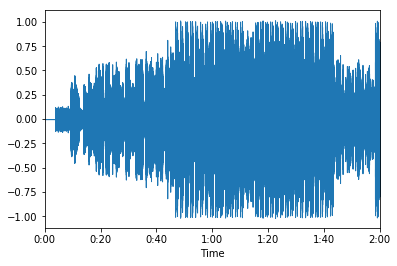

In [3]:
#Load 120 seconds of the audios
JColeApparently = librosa.load('data/J. Cole - Apparently (Official Music Video).mp3', duration = 120)
RihannaDiamonds = librosa.load('data/Rihanna - Diamonds.mp3', duration = 120)

#Plot the time-domain waveform of JColeApparently
librosa.display.waveplot(JColeApparently[0])

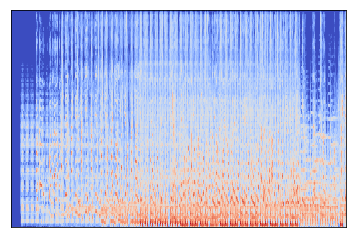

In [4]:
#Calculate and display the mel spectogram with a logged scale for JColeApparently
JColeApparently_mel = librosa.feature.melspectrogram(JColeApparently[0])
JColeApparently_mel_log = librosa.power_to_db(JColeApparently_mel)
librosa.display.specshow(JColeApparently_mel_log)

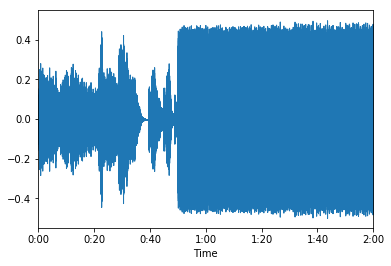

In [5]:
#Plot the time-domain waveform of RihannaDiamonds
librosa.display.waveplot(RihannaDiamonds[0])

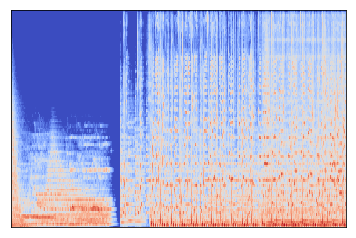

In [6]:
#Calculate and display the mel spectogram with a logged scale for RihannaDiamonds
RihannaDiamonds_mel = librosa.feature.melspectrogram(RihannaDiamonds[0])
RihannaDiamonds_mel_log = librosa.power_to_db(RihannaDiamonds_mel)
librosa.display.specshow(RihannaDiamonds_mel_log)

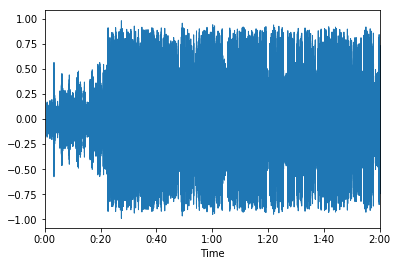

In [7]:
#Load 120 seconds of the audios
JColeWetDreamz = librosa.load('data/J. Cole - Wet Dreamz (Official Music Video).mp3', duration = 120)
RihannaWork = librosa.load('data/Rihanna - Work (Explicit) ft. Drake.mp3', duration = 120)

#Plot the time-domain waveform of JColeWetDreamz
librosa.display.waveplot(JColeWetDreamz[0])

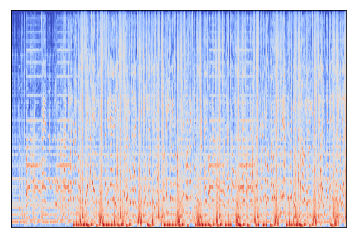

In [8]:
#Calculate and display the mel spectogram with a logged scale for JColeWetDreamz
JColeWetDreamz_mel = librosa.feature.melspectrogram(JColeWetDreamz[0])
JColeWetDreamz_mel_log = librosa.power_to_db(JColeWetDreamz_mel)
librosa.display.specshow(JColeWetDreamz_mel_log)

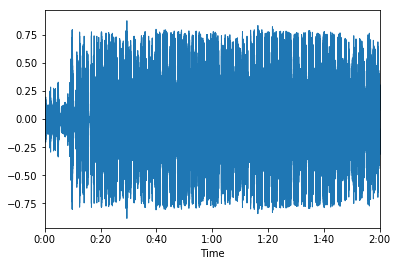

In [9]:
#Plot the time-domain waveform of RihannaWork
librosa.display.waveplot(RihannaWork[0])

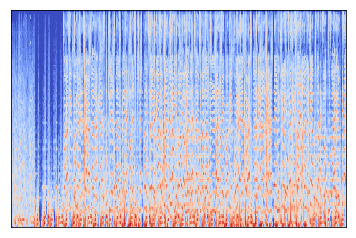

In [10]:
#Calculate and display the mel spectogram with a logged scale for RihannaWork
RihannaWork_mel = librosa.feature.melspectrogram(RihannaWork[0])
RihannaWork_mel_log = librosa.power_to_db(RihannaWork_mel)
librosa.display.specshow(RihannaWork_mel_log)

In [11]:
genre_classifier('data/J. Cole - Apparently (Official Music Video).mp3', 'data/Rihanna - Diamonds.mp3')

0.7517401392111369

In [12]:
genre_classifier('data/J. Cole - Wet Dreamz (Official Music Video).mp3', 'data/Rihanna - Diamonds.mp3')

0.728538283062645

In [13]:
genre_classifier('data/J. Cole - Wet Dreamz (Official Music Video).mp3', 'data/Rihanna - Work (Explicit) ft. Drake.mp3')

0.8793503480278422

In [14]:
genre_classifier('data/J. Cole - Apparently (Official Music Video).mp3', 'data/Rihanna - Work (Explicit) ft. Drake.mp3')

0.8897911832946636

In [15]:
genre_classifier('data/Rihanna - Diamonds.mp3', 'data/Rihanna - Work (Explicit) ft. Drake.mp3')

0.6264501160092807

In [16]:
genre_classifier('data/J. Cole - Apparently (Official Music Video).mp3', 'data/J. Cole - Wet Dreamz (Official Music Video).mp3')

0.8109048723897911

Findings: 

The two songs from J. Cole (Apparently, Wet Dreamz) are the genre of Hip-Hop/Rap, and the two songs from Rihanna (Diamonds, Work) are the genre of Pop according to Google (Google Search tell you the genre of song when you search the song name). Thus, the songs Apparently and Wet Dreamz should have low scores when compared, and the songs Diamonds and Work should also have low scores.

Apparently, that is seems to be the case as the classifier score between between Diamonds and Work is low (0.62). Expectedly, the score between Rihanna's Work, a pop song, and both J. Cole's Hip-Hop/Rap songs is really high (0.88 and 0.89), showing that they are indeed two different genres. Score between Apparently and Wet Dreamz is lower, but not the best (0.81).  Though, the scores between Rihanna's Diamonds and the two of J. Cole's Hip-Hop/Rap songs are 0.75 and 0.73, and lower than the score between J. Cole's own songs Apparently and Wet Dreamz.

Some guesses can be drawn:

1) The method of the genre classifier which uses MFCCs to measure similarities between songs' genres may be reliable.
    - Just a note, obviously, Work and Apparently and Wet Dreamz have similar looking plotted waveforms (not the MFCC) in terms of shapes and therefore they may have high scores. 
    - Maybe songs with similar looking plotted waveforms tend to have high score; there may be possible correlation between Waveforms and MFCCs.
    
2) It is just the song Diamonds that's special; it has a lower score compared against the Hip-Hop songs than the Hip-Hop songs themselves, but not much.
    - Then that means artists has many different genres of songs.
    - Nowadays, so-called "Pop" songs has a mix of different genres and styles inside their arrangemment. Many music styles can be all used in and called "Pop". Because "Pop" music is so diverse, it is hard to use genre classifier and be accurate all the time.